In [1]:
# Convert audio (wav) files into spectrograms (png) for image analysis with CNN

In [ ]:
import os
import numpy as np
from glob import glob
from scipy import signal
from scipy.io import wavfile
from scipy.interpolate import interp2d
from PIL import Image
from IPython.display import clear_output

In [11]:
# Specify name and path of folder with audio files
name = 'rihanna'
path_in = 'data/' + name + '/'

# Specifcy output folder for png
#path_out = 'data_images/house/'
path_out = 'data_images_test/' + name + '/'

# Infer list of wav files
wav_list = glob(path_in + '*.wav')

In [12]:
# Set min and max frequencies for the spectrogram
freq_min = 100
freq_max = 10000
# Use 100 frequencies with sqrt spacing
freq_range = np.linspace(np.sqrt(freq_min),np.sqrt(freq_max),100)**2.

# For 100x100 png files, use also 100 times for the spectrogram within the 5s audio files
time_min = 0.025
time_max = 4.975
time_range = np.linspace(time_min,time_max,100)

In [13]:
# Convert wav to png
for i in range(0,len(wav_list),1):
    
    # Optional: Use only every n-th audio file, if too many
    #if( np.mod(i,3) == 0 ):
    #    continue
    
    filename = wav_list[i].split('\\')[-1][:-4]
    
    clear_output(wait=True)
    print(filename)
    
    # Read data from audio file
    sample_rate, samples = wavfile.read(path_in + filename + '.wav')
    samples = (np.transpose(samples)[0] + np.transpose(samples)[1])/2.

    # Set nperseg parameter to fit desired spectrogram
    nperseg = int(sample_rate/20.)

    # Calculcate spectrogram with SciPy
    frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate,
                                                         nperseg = nperseg , noverlap=0, nfft = 2*nperseg)

    # Interpolate spectrogram
    SpectrInt = interp2d(times,frequencies,spectrogram)

    # Take sqrt of spectrogram values for better contrast (log does not yield sufficient results)
    new_spectrogram = np.sqrt( SpectrInt(time_range,freq_range) )

    # Reshape for more intuitive image (low frequencies at bottom)
    new_spectrogram = new_spectrogram[::-1]

    # Rescale
    rescaled = (255.0 / new_spectrogram.max() * (new_spectrogram - new_spectrogram.min())).astype(np.uint8)

    # Save png
    im = Image.fromarray(rescaled)
    im.save(path_out + filename + '.png')

0056


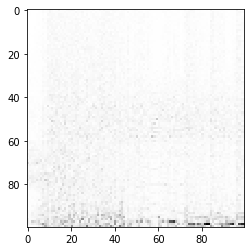

In [18]:
# Display example spectrogram
import matplotlib.pyplot as plt
from matplotlib.image import imread
test = imread(path_out + '0001.png')
plt.imshow(test,cmap='Greys')